# MNIST Handwritten Digit Recognition

# Importing libraries 

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

# Loading the MNIST datasets

In [164]:
data_df = pd.read_csv("data.csv")
#test_df = pd.read_csv("test.csv")

In [165]:
data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
#test_df.head()

# For train and test both we will use train.csv (Taking train data as complete data)

In [167]:
data_df.shape

(42000, 785)

# Data Preparation for Model Building

In [168]:
y=data_df['label']
x=data_df.drop('label',axis=1)

In [169]:
#x_for_test_data=test_df[:]

In [170]:
type(x)

pandas.core.frame.DataFrame

The third line is used so that the row at the some_digit index in the dataset is selected and is then converted into a numpy array.

3


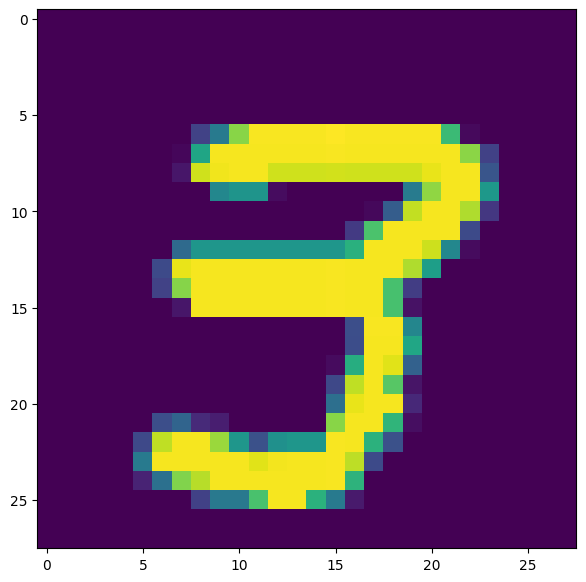

In [171]:
plt.figure(figsize=(7,7))
some_digit=2000
some_digit_image = x.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))
print(y[some_digit])

<Axes: xlabel='label', ylabel='count'>

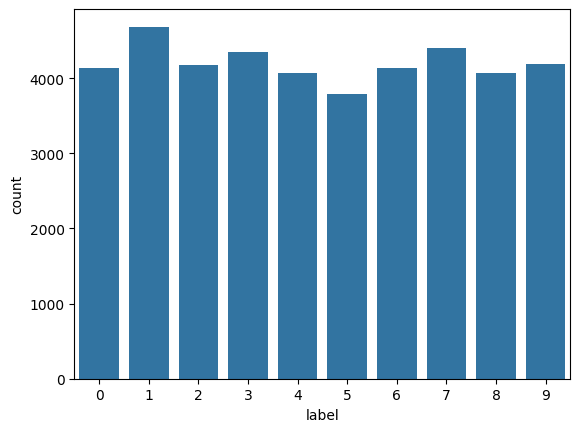

In [172]:
sns.countplot( x='label', data=data_df) 

#### we can conclude that our dataset is balanced

# Splitting the train data  into train and test 

In [173]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.75, random_state = 0)

In [174]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((10500, 784), (10500,), (31500, 784), (31500,))

# **Models**

# KNN

In [175]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x_train,y_train)
# x_train = scaler.transform(x_train)
# x_train.shape

# k=3

In [176]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [177]:
y_pred = classifier.predict(x_test)
y_pred

array([3, 6, 9, ..., 6, 6, 8], dtype=int64)

In [178]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))

0.9499047619047619


In [179]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3092
           1       0.93      0.99      0.96      3517
           2       0.97      0.93      0.95      3119
           3       0.94      0.95      0.94      3291
           4       0.96      0.94      0.95      3078
           5       0.94      0.94      0.94      2855
           6       0.97      0.98      0.97      3050
           7       0.94      0.95      0.95      3298
           8       0.98      0.88      0.93      3066
           9       0.92      0.93      0.92      3134

    accuracy                           0.95     31500
   macro avg       0.95      0.95      0.95     31500
weighted avg       0.95      0.95      0.95     31500



In [180]:
print(confusion_matrix(y_test, y_pred))

[[3067    1    4    1    0    5   13    0    1    0]
 [   0 3493    6    1    3    0    3    8    2    1]
 [  48   54 2914   11    2    3    3   65   13    6]
 [  11   17   29 3113    2   59    1   22   20   17]
 [   4   38    0    0 2904    0   14    3    0  115]
 [  14   13    3   63    9 2677   48    0    8   20]
 [  23    5    2    0    3   15 3001    0    1    0]
 [   4   55   14    2   20    0    0 3149    0   54]
 [  23   52   21   99   20   76   23   13 2700   39]
 [  21   12    7   33   60    9    2   82    4 2904]]


In [181]:
#y_pred_on_test_data = classifier.predict(x_for_test_data)
#y_pred_on_test_data

## **3NN-96.65% accuracy**

## **Trying out multiple different values to test the effect of Training:Testing Split and the value of K in KNN has on the model accuracy.**

## Note: this method takes a significant amount of time to load. 

In [1]:
# from sklearn.model_selection import  train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# knn_values = [2,4,5,6,7,10]

# test_split_values=[0.4,0.3,0.25,0.20,0.1,0.05]


# for kv in knn_values:
#     for tsv in test_split_values:
#         print(f"The value of knn classifier is ${kv} and the value of test split is ${tsv}")
#         x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = tsv, random_state = 40)
#         x_train.shape,y_train.shape,x_test.shape,y_test.shape
        
#         classifier = KNeighborsClassifier(n_neighbors = kv)
#         classifier.fit(x_train, y_train)
#         y_pred = classifier.predict(x_test)
#         y_pred
#         print(accuracy_score(y_test, y_pred))
#         print(classification_report(y_test, y_pred))
#         print(confusion_matrix(y_test, y_pred))